# Gradient Descent

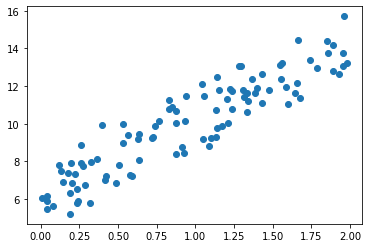

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4x + 6에 근사시킵니다.(w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 만들어줍니다.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

밑의 w1_update, w0_update를 계산하는 공식은 각각  $-\eta$ $2 \over N $ $\displaystyle\sum_{i=1}^{N}$ $x_i \times (예측오류_i)$, $-\eta$ $2 \over N $ $\displaystyle\sum_{i=1}^{N} $ $ (예측오류_i) $ 

In [2]:
# w1과 w0을 업데이트 할 w1_update, w0_update 반환하는 함수

def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1) 
    w0_update = np.zeros_like(w0) 

    # 예측 배열 계산, 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1을 가진 행렬 생성
    w0_factors = np.ones((N,1)) 

    # w1과 w0을 업데이트할 w1_update와 w0_update를 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) 
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [3]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용하는 함수

def gradient_descent_steps(X, y, iters = 10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0를 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

RSS (Residual Sum of Square)으로 cost 계산 (loss function)

In [4]:
# 비용 함수를 정의하는 함수

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N 
    return cost

# w1과 w0를 구하고, 최종적으로 예측값과 실제값의 RSS 차이를 계산

w1, w0 = gradient_descent_steps(X, y, iters=1000) 
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred =  w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost : 0.9935


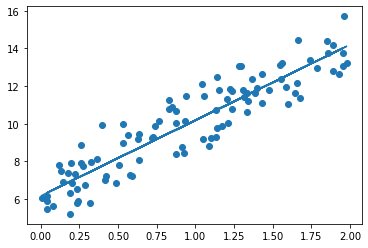

In [5]:
plt.scatter(X, y)
plt.plot(X, y_pred)

# Stochastic Gradient Descent

gradient descent (경사 하강법)이 전체 입력 데이터로 가중치가 업데이트 되는 값을 계산한다면, 확률적 경사 하강법은 일부 데이터만 이용해서 최적 비용함수를 도출함

In [6]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)

        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000)
y_pred = w1[0,0] * X + w0
print("w1:{0:.3f},  w0:{1:.3f}".format(w1[0,0], w0[0,0]))
print("cost:{0:.3f}".format(get_cost(y, y_pred)))

w1:4.028,  w0:6.156
cost:0.994


# sklearn LinearRegression class

* 사이킷런에서 구현한 클래스 : LinearRegression
* LinearRegression 클래스는 예측값과 실제 값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스이다. 
* fit( ) 메서드로 배열을 입력받아서 회귀 계수 및 절편을 각각 coef_, intercept_ 속성에 저장

### 회귀 평가 지표

회귀 평가 지표들 / 사이킷런 평가 지표 API
* MAE : metrics.mean_absolute_error
* MSE : metrics.mean_squared_error
* RMSE : 따로 없음, np.sqrt(MSE)로 구하기
* MSLE : metrics.mean_squared_log_error
* $R^2$ : metrics.r2_score

### 보스턴 주택 가격 예측 모델링

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

#boston 데이터셋 로드 및 데이터프레임 생성
bostonDF = pd.read_csv('boston.csv')

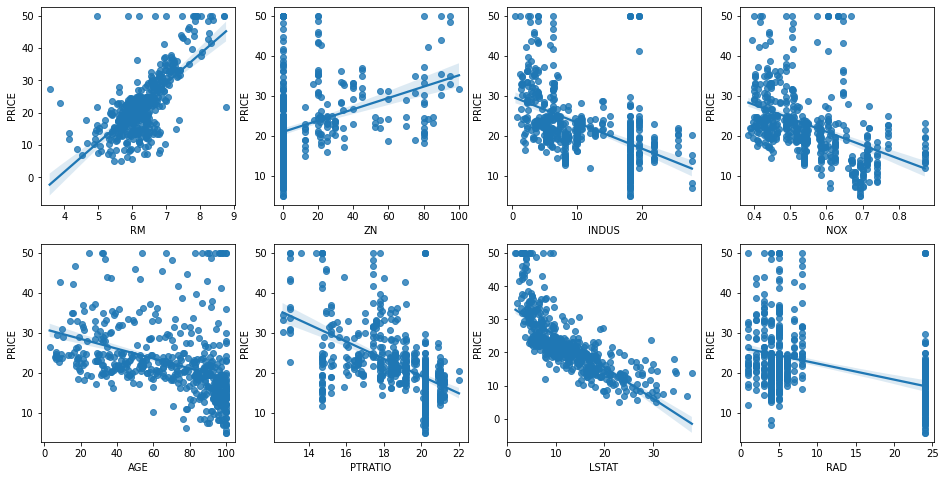

In [2]:
#2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4X2개의 ax를 가짐.
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows =2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i,features in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=features, y='PRICE', data = bostonDF, ax = axs[row][col])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis =1, inplace =False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size =0.3, random_state =156)

**scikit learn API로 LOSS 확인**

In [4]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
R2Score = r2_score(y_test, y_pred)
RMSE = np.sqrt(MSE)

print('MSE: {0:.3f}, RMSE: {1:.3f}, R2 score: {2:.3f}'.format(MSE, RMSE, R2Score))

MSE: 17.297, RMSE: 4.159, R2 score: 0.757


In [5]:
print('절편값 :' ,LR.intercept_)
print('회귀 계수값 :',LR.coef_)

절편값 : 40.995595172164506
회귀 계수값 : [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


**cross val score 교차 검증으로 loss 확인**

In [6]:
from sklearn.model_selection import cross_val_score
neg_mse_score = cross_val_score(LR, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)

In [7]:
neg_mse_score

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [8]:
rmse_score = np.sqrt(-1 * neg_mse_score)
rmse_score

array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405])

In [9]:
np.mean(rmse_score)

5.828658946215835

5개의 폴드 세트로 교차 검증을 수행한 결과, 평균 RMSE는 약 5.8286이다. 